In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Email spam filter/emails.csv')

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [ ]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
ham = df[df['spam']==0]

In [ ]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
spam = df[df['spam']==1]

In [ ]:
print((len(spam)/len(df))*100)

23.88268156424581


In [ ]:
print((len(ham)/len(df))*100)

76.11731843575419


<Axes: ylabel='count'>

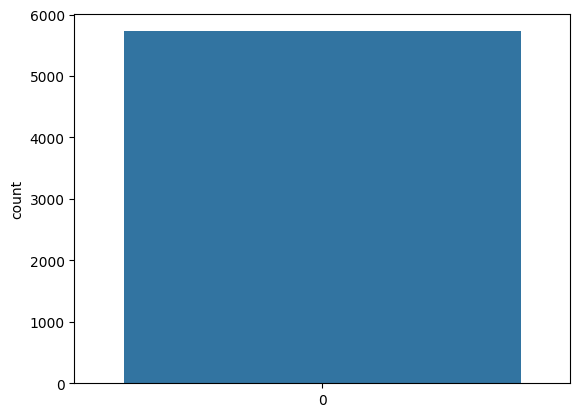

In [ ]:
sns.countplot(data = df['spam'])

In [ ]:
df.spam.count()

5728

In [ ]:
df[df.spam==1].count()

text    1368
spam    1368
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
vectorizer.fit_transform(sample_data)

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [ ]:
spamham_countvectorizer = vectorizer.fit_transform(df['text'])

In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [ ]:
len(vectorizer.get_feature_names_out())

37303

In [ ]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
spamham_countvectorizer.shape

(5728, 37303)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_classifier = MultinomialNB()

In [ ]:
label = df['spam'].values

In [ ]:
label

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
nb_classifier.fit(spamham_countvectorizer,label)

MultinomialNB()

In [ ]:
testing  = ['Free food','Hi harsh, let me know if you need help']
testing_countervectorizer = vectorizer.transform(testing)

In [ ]:
predict =  nb_classifier.predict(testing_countervectorizer)
predict

array([1, 0])

In [ ]:
testing_sample = ['Hello, I am Harsh, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']

In [ ]:
testing_countervectorizer = vectorizer.transform(testing_sample)

In [ ]:
predict =  nb_classifier.predict(testing_countervectorizer)
predict

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = spamham_countvectorizer
y = label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X.shape

(5728, 37303)

In [ ]:
y.shape

(5728,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialNB()

In [ ]:
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predict = NB_classifier.predict(X_train)

In [ ]:
predict

array([0, 0, 1, ..., 1, 1, 0])

<Axes: >

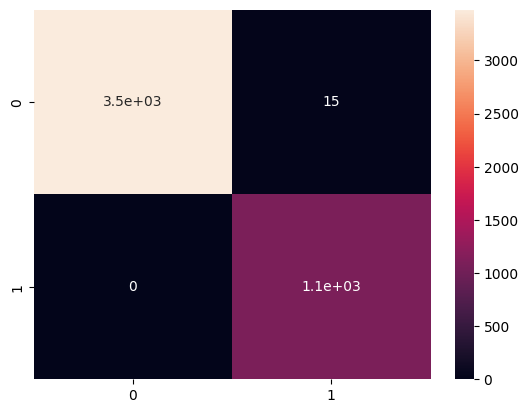

In [ ]:
cm = confusion_matrix(y_train, predict)
sns.heatmap(cm, annot=True)

In [ ]:
test_predict = NB_classifier.predict(X_test)

<Axes: >

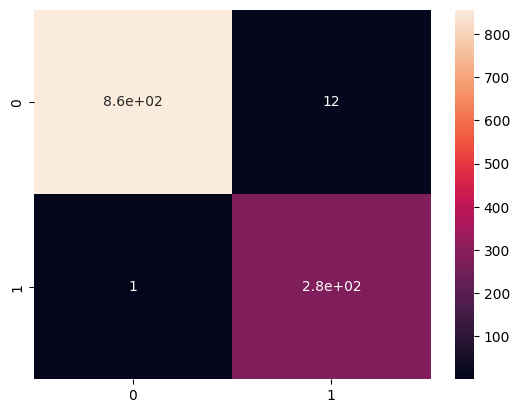

In [ ]:
cm2 = confusion_matrix(y_test, test_predict)
sns.heatmap(cm2, annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.96      1.00      0.98       278

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

